#  Spatially cascading effect of perturbations in experimental meta-ecosystems

N= biomass of a species

r= growth rate

K= carrying capacity

$f$ =frequency of perturbations

$I$ = Intensity of perturbations


The equation below descrites the dynamics of a population density N with a simple losgistic model

$$ \frac{dN}{dt}=rN\left(1-\frac{N}{K}\right)$$

From the death population of N, we can calculate the detritus pool formed.  At a frequency $f$, a perturbation provokes the death of a fraction $I$ of the population (perturbation intensity).


The fraction removed from N and is considered as a subsidy. This leads to the following equation to characterized subsidy dynamics:

$$S(nT)= N_{p}(nT) * I$$

$T=\frac{1}{f}$ = the time between two perturbations (period)

$n$ =the number of perturbations

$N_{p}$ = the biomass of the population at time $nT$


Important: They assume that all species are at equilibrium $N=K$ and the perturbations are texted here


## Lets model the logistic growth equation first (with no perturbations)


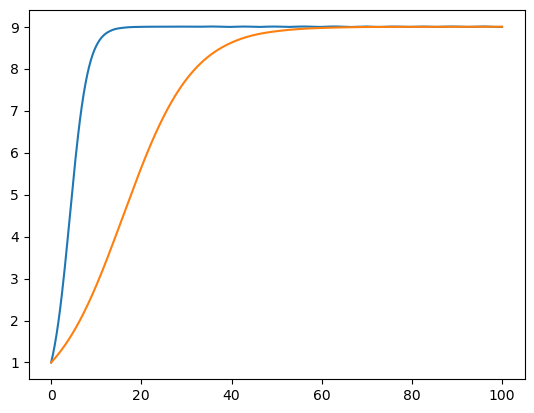

In [65]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

N0=1
K= 9
r= 0.13

dt=0.01
t0=0
tmax=100

def logistic_system (t, N,r,K):
    dNdt=r*N*(1-N/K)
    
    return dNdt
    
def Numerical_sol (logistic_system, N0, r, K, tmax=tmax, full_output=False):

    t_span= (0, tmax) #Time range for the simulation
    t_eval=np.linspace(t_span[0], t_span[1], 500) #Evaluation points

    sol=solve_ivp(logistic_system, t_span, [N0], args=(r,K), t_eval=t_eval, method='RK45')

    #Return the final state variables at tmax

    if full_output:
        return sol
    else:
        return sol.y[0], sol.t

solution, time= Numerical_sol(logistic_system, N0, r, K, tmax=tmax)

solution1, time1=Numerical_sol(logistic_system, N0, 0.5,K, tmax=tmax)
plt.plot(time1, solution1)
plt.plot(time, solution, label='N(t)')


## Lets Model our logisitic growth equation with Perturbations and subsidy from the removed N


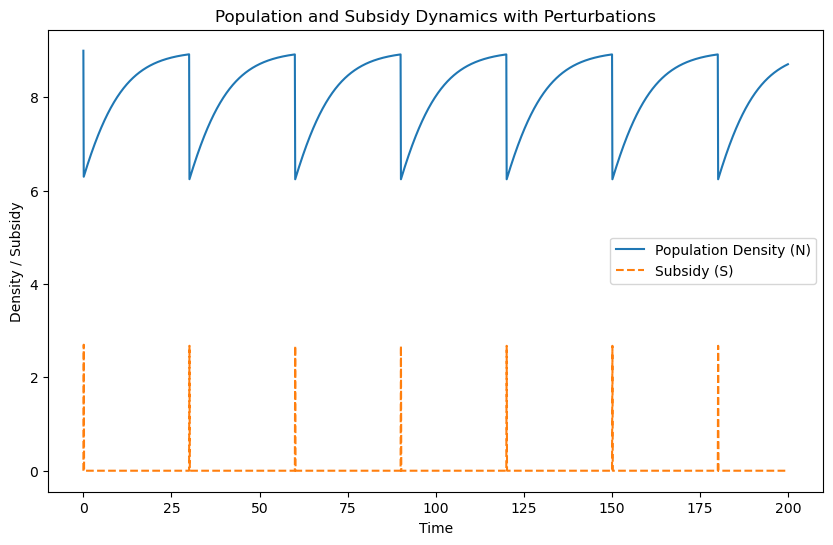

In [252]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r = 0.13  # Growth rate
K = 9.0   # Carrying capacity
I = 0.3   # Perturbation intensity
f = 1/30  # Perturbation frequency
T = 1/f   # Time between perturbations

# Time parameters
t_max = 200  # Total time
dt = 0.1     # Time step
time = np.arange(0, t_max, dt)

# Initial conditions
N = K  # Initial population at carrying capacity
N_values = [N]
S_values = [0]

# Track perturbation times explicitly
perturbation_times = np.arange(0, t_max, T)

# Simulation loop
for t in time:
    # Logistic growth
    dN = r * N * (1 - N/K) * dt
    N += dN
    
    # Check if the current time is a perturbation time
    if t in perturbation_times:
        S = N * I  # Subsidy generated at this perturbation
        N -= S     # Remove the subsidy from the population
        S_values.append(S)
    else:
        S_values.append(0)
    
    N_values.append(N)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time, N_values[:-1], label='Population Density (N)')
plt.plot(time, S_values[:-1], label='Subsidy (S)', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Density / Subsidy')
plt.legend()
plt.title('Population and Subsidy Dynamics with Perturbations')
plt.show()

## Using equation 3.2, model the relationship between subsidy and perturbation Intensity

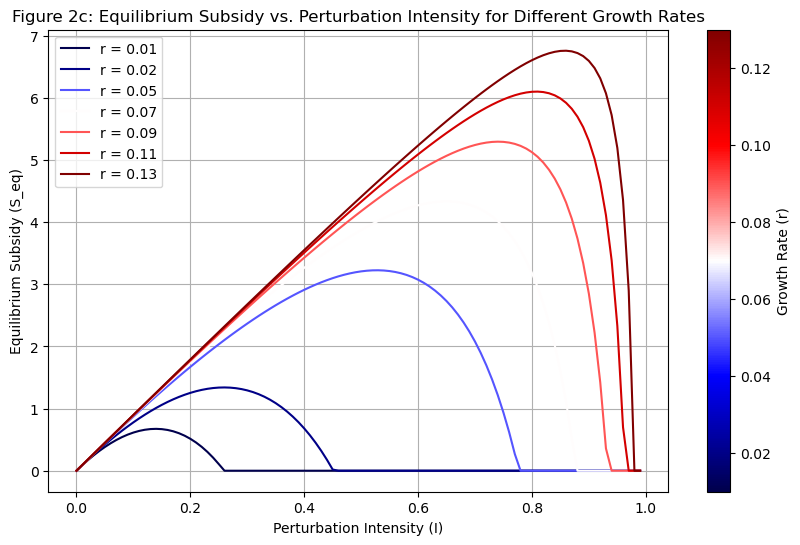

In [250]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Parameters
K = 9.0  # Carrying capacity
f = 1/30  # Perturbation frequency
T = 1/f  # Time between perturbations

# Range of perturbation intensities (I) and growth rates (r)
I_values = np.linspace(0, 0.99, 100)  # Perturbation intensity from 0 to 0.99
r_values = [0.01, 0.02, 0.05, 0.07, 0.09, 0.11, 0.13]  # Growth rates

# Function to calculate equilibrium subsidy S_eq
def calculate_Seq(I, r, K, T):
    if r * T + np.log(1 - I) <= 0:
        return 0  # Population crashes, no subsidy
    a = np.exp(-r * T) / (1 - I)
    Seq = (K * I) / (1 + I * (1 / (1 - a) - 1))
    return Seq

# Calculate S_eq for each combination of I and r
Seq_values = np.zeros((len(r_values), len(I_values)))
for i, r in enumerate(r_values):
    for j, I in enumerate(I_values):
        Seq_values[i, j] = calculate_Seq(I, r, K, T)

# Create a colormap for the growth rates
cmap = plt.get_cmap('seismic')  # You can change 'viridis' to any other colormap
norm = Normalize(vmin=min(r_values), vmax=max(r_values))  # Normalize growth rates for colormap
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

# Plot the results with color gradient
plt.figure(figsize=(10, 6))
for i, r in enumerate(r_values):
    color = cmap(norm(r))  # Get color from colormap
    plt.plot(I_values, Seq_values[i, :], color=color, label=f'r = {r:.2f}')

# Add colorbar
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Growth Rate (r)')

# Labels and title
plt.xlabel('Perturbation Intensity (I)')
plt.ylabel('Equilibrium Subsidy (S_eq)')
plt.title('Figure 2c: Equilibrium Subsidy vs. Perturbation Intensity for Different Growth Rates')
plt.legend(loc='best')
plt.grid(True)
plt.show()